In [1]:
import findspark
findspark.init()
findspark.find()

'C:\\Users\\Ravinder.Ahuja\\AppData\\Roaming\\Python\\Python39\\site-packages\\pyspark'

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark=SparkSession.builder.appName('data cleaning').getOrCreate()

##### Data preprocessing’s techniques we are going to discuss

- Drop null value
- Handle missing value with imputation
- Outlier detection, removal and imputation
- Drop feature/column
- Convert categorical feature/column into numerical
- Feature scaling

In [ ]:
#import findspark
#findspark.init()

In [ ]:
# Create pyspark dataframe
data = [[1,None,"vignan",95.0],
       [None,"ojaswi","vvit",55.0],
       [3,None,"vvit",65.0],
       [None,"sridevi","vignan",None],                                                                                                   [None,"Alrich","nonvignan",56.0],
       [1,None,None,55.0],
       [5,"gnanesh","iit",1.0],
       [1,None,"vignan",95.0],
       [6,None,"vignan",22.0]]
# specify column names
columns = ['student_ID','student_name', 'college','marks']
# creating a dataframe from the lists of data
dataframe = spark.createDataFrame(data,columns)
# show dataframe
dataframe.show()
print(type(dataframe))
display(dataframe)


In [ ]:
from pyspark.sql.functions import *
print(dataframe.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dataframe.columns]).show(5))

In [ ]:
dataframe = dataframe.dropna()
dataframe.show()

#### Handle missing value with imputation

1. For numeric column
- Mean imputation
- Median imputation
- Mode imputation
2. For categorical column

- Frequent category imputation

#### Mean imputation

Mean imputation is carried out on numeric feature/column. In this imputation missing value will be replaced by the mean of a particular feature/column.

In [ ]:
dataframe.printSchema()

In [ ]:
from pyspark.ml.feature import Imputer
column_subset = [col_ for col_ in dataframe.columns if dataframe.select(col_).dtypes[0][1] !="string"]
imputer = Imputer(inputCols=column_subset,
                  outputCols=[col_ for col_ in column_subset]
                  ).setStrategy("mean")
dataframe = imputer.fit(dataframe).transform(dataframe)
dataframe.show()

### Median imputation

Median imputation is carried out on numeric feature/column. In this imputation missing value will be replaced by the median of a particular feature/column.

In [ ]:
from pyspark.ml.feature import Imputer
column_subset = [col_ for col_ in dataframe.columns if dataframe.select(col_).dtypes[0][1] !="string"]
imputer = Imputer(inputCols=column_subset,
                  outputCols=[col_ for col_ in column_subset]
                  ).setStrategy("median")
dataframe = imputer.fit(dataframe).transform(dataframe)
dataframe.show()

#### Mode imputation

Mode imputation is carried out on numeric feature/column. In this imputation missing value will be replaced by the mode of a particular feature/column.

In [ ]:
column_subset = [col_ for col_ in dataframe.columns if dataframe.select(col_).dtypes[0][1] !="string"]
for col_ in column_subset:
    temp_col = dataframe.groupBy(col_).count()
    temp_col = temp_col.dropna(subset=col_)
    mode = temp_col.orderBy(temp_col['count'].desc()).collect()[0][0]
    dataframe = dataframe.fillna(mode, subset=col_)
dataframe.show()

#### Frequent category imputation

Now we saw all imputation method for the numeric column. What if DataFrame’s column is categorical?

For that we’ll use frequent category imputation technique. In this technique we’ll impute missing value by the frequently occurred category.

#### Outlier detection, removal and imputation

What is outlier?

In layman terms outliers are the data points that differs significantly from the observations. Or we can say that outliers are “the one of these things is not like others”.😉

#### What are Outliers? 🤔
We all have heard of the idiom ‘odd one out which means something unusual in comparison to the others in a group.

Similarly, an Outlier is an observation in a given dataset that lies far from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the set.

Outlier
An outlier is an observation of a data point that lies an abnormal distance from other values in a given population. (odd man out)

Like in the following data point (Age)
18,22,45,67,89,155,30

An outlier is an object(s) that deviates significantly from the rest of the object collection.

List of Cities
New York, Las Angles, London, France, Delhi, Chennai

It is an abnormal observation during the Data Analysis stage, that data point lies far away from other values.

List of Animals
cat, fox, rabbit, fish

An outlier is an observation that diverges from well-structured data. The root cause for the Outlier can be an error in measurement or data collection error.

Why do they occur?
An outlier may occur due to the variability in the data, or due to experimental error/human error.

Incorrect data entry or error during data processing.

Missing values in a dataset.

Data did not come from the intended sample.

Errors occur during experiments.

Not an errored, it would be unusual from the original.

Extreme distribution than normal.

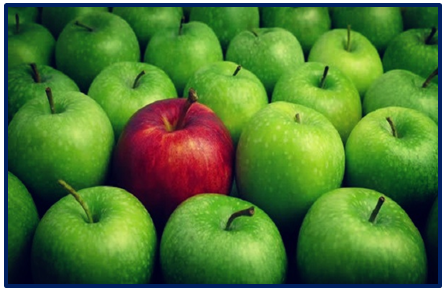

Example: Consider a small dataset, sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]. By looking at it, one can quickly say ‘101’ is an outlier that is much larger than the other values.

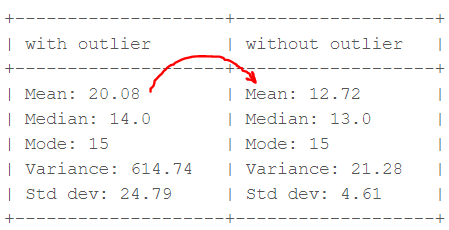

#### Outlier detection

There are many methods for detecting outlier but here we’ll mainly focus on following two methods.

- Using Z-score
- Using IQR

#### Using Z-score

Z-score is a parametric outlier detection method in a one or low dimensional feature space.

This technique assumes a normal distribution/Gaussian distribution of the data. The outliers are the data points that are in the tails of the distribution and therefore far from the mean.

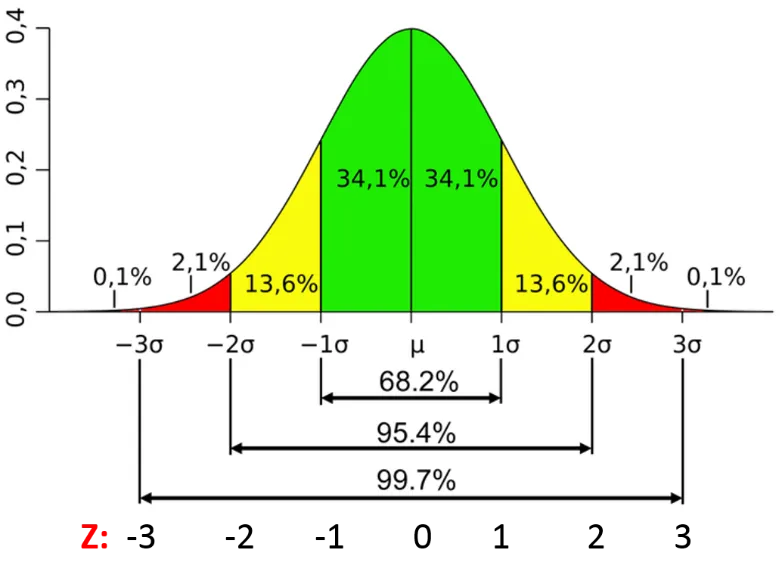

A normal distribution/Gaussian distribution is shown above and it is estimated that,

- 68% of the data points lie between +/- 1 standard deviation.

- 95% of the data points lie between +/- 2 standard deviation

- 99.7% of the data points lie between +/- 3 standard deviation

#### We can find Z-score using below formula

Z-score = (x -mean) / standard deviation

If the z-score of a data point is more than +/- 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

In [ ]:
data = [["Patty O’Furniture",5.9],
        ["Paddy O’Furniture",5.2],
        ["Olive Yew",5.1],
        ["Aida Bugg",5.5],
        ["Maureen Biologist",4.9],
        ["Teri Dacty",5.4],
        ["Peg Legge",6.2],
        ["Allie Grate",6.5],
        ["Liz Erd",7.1], 
        ["A. Mused",14.5],
        ["Constance Noring",6.1],
        ["Lois Di Nominator",5.6],
        ["Minnie Van Ryder",1.2],
        ["Lynn O’Leeum",5.5]]
columns = ['student_name','height']
dataframe = spark.createDataFrame(data,columns)
dataframe.show()

#### Now let’s detect outlier in above DataFrame using Z-score method



In [ ]:
from pyspark.sql.functions import *
column_subset = dataframe.columns
for col in column_subset:
    if dataframe.select(col).dtypes[0][1]=="string":
        pass
    else:
        mean = dataframe.select(mean(col)).collect()[0][0]
        stddev = dataframe.select(stddev(col)).collect()[0][0]
        upper_limit = mean + (3*stddev)
        lower_limit = mean - (3*stddev)
        dataframe1 = dataframe.filter((dataframe[col]<lower_limit) | (dataframe[col]>upper_limit))
dataframe1.show()

### Z-score Outlier removal

In [ ]:
from pyspark.sql.functions import *
column_subset = dataframe.columns
for col in column_subset:
    if dataframe.select(col).dtypes[0][1]=="string":
        pass
    else:
        mean = dataframe.select(mean(col)).collect()[0][0]
        stddev = dataframe.select(stddev(col)).collect()[0][0]
        print(mean)
        print(stddev)
        upper_limit = mean + (3*stddev)
        lower_limit = mean - (3*stddev)
        dataframe = dataframe.filter((dataframe[col]>lower_limit) & (dataframe[col]<upper_limit))
dataframe.show()

#### Using IQR

IQR (interquartile range) is a measure of statistical dispersion, which is the spread of the data. The IQR may also be called the midspread, middle 50%, or H‑spread. It is defined as the difference between the 75th and 25th percentiles of the data.

or

The IQR (interquartile range) defines the difference between the third and the first quartile. Quartiles are the partitioned values that divide the whole series into 4 equal parts. So, there are 3 quartiles. First Quartile is denoted by Q1 known as the lower quartile, the second Quartile is denoted by Q2 and the third Quartile is denoted by Q3 known as the upper quartile. Therefore, the interquartile range is equal to the upper quartile minus lower quartile.



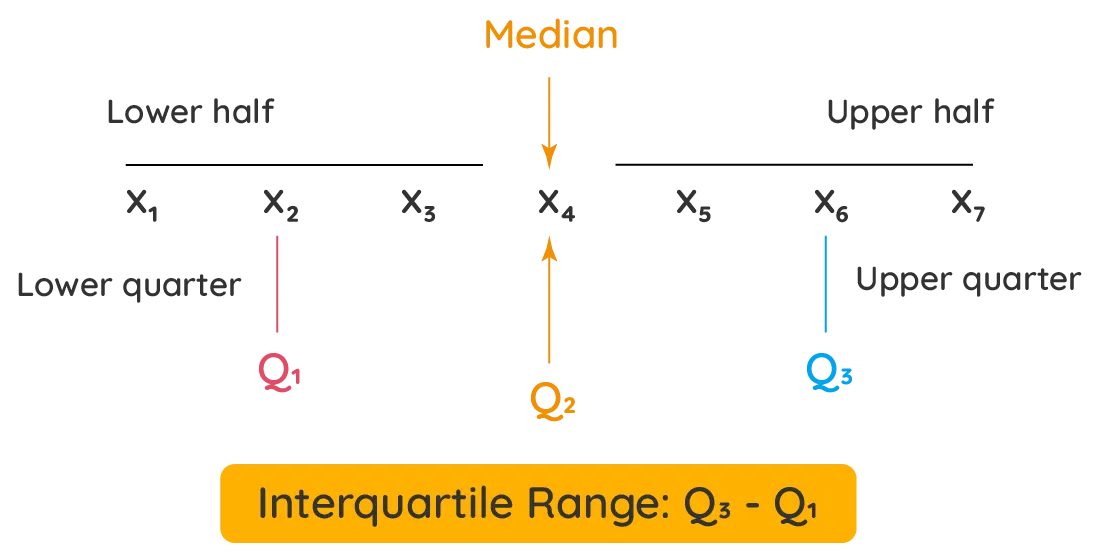

IQR = Q3 - Q1

Lower Bound: (Q1 - 1.5 * IQR)
Upper Bound: (Q3 + 1.5 * IQR)

In [ ]:
data = [["Patty O’Furniture",5.9],
        ["Paddy O’Furniture",5.2],
        ["Olive Yew",5.1],
        ["Aida Bugg",5.5],
        ["Maureen Biologist",4.9],
        ["Teri Dacty",5.4],
        ["Peg Legge",6.2],
        ["Allie Grate",6.5],
        ["Liz Erd",7.1], 
        ["A. Mused",14.5],
        ["Constance Noring",6.1],
        ["Lois Di Nominator",5.6],
        ["Minnie Van Ryder",1.2],
        ["Lynn O’Leeum",5.5]]
columns = ['student_name','height']
dataframe = spark.createDataFrame(data,columns)
dataframe.show()

In [ ]:
for col_ in dataframe.columns:
    if dataframe.select(col_).dtypes[0][1]=="string":
        pass
    else:
        q1,q3 = dataframe.approxQuantile(col_,[0.25, 0.75],0) 
        IQR = q3 - q1
        lower_bound = q1 - (1.5*IQR)
        upper_bound = q3 + (1.5*IQR)
        dataframe = dataframe.filter((dataframe[col]<lower_bound) |  (dataframe[col]>upper_bound))
dataframe.show()

In [ ]:
data = [["Patty O’Furniture",5.9],
        ["Paddy O’Furniture",5.2],
        ["Olive Yew",5.1],
        ["Aida Bugg",5.5],
        ["Maureen Biologist",4.9],
        ["Teri Dacty",5.4],
        ["Peg Legge",6.2],
        ["Allie Grate",6.5],
        ["Liz Erd",7.1], 
        ["A. Mused",14.5],
        ["Constance Noring",6.1],
        ["Lois Di Nominator",5.6],
        ["Minnie Van Ryder",1.2],
        ["Lynn O’Leeum",5.5]]
columns = ['student_name','height']
dataframe = spark.createDataFrame(data,columns)
dataframe.show()

#### IQR Outlier removal



In [ ]:
for col_ in dataframe.columns:
    if dataframe.select(col_).dtypes[0][1]=="string":
        pass
    else:
        q1,q3 = dataframe.approxQuantile(col_,[0.25, 0.75],0) 
        IQR = q3 - q1
        lower_bound = q1 - (1.5*IQR)
        upper_bound = q3 + (1.5*IQR)
        dataframe1 = dataframe.filter((dataframe[col]>lower_bound) & (dataframe[col]<upper_bound))
dataframe1.show()